In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import seaborn as sns

In [3]:
df = pd.read_csv('colored_ad_click_table.csv')
num_rows, num_cols = df.shape
print(f"Table contains {num_rows} rows and {num_cols} columns")


Table contains 30 rows and 41 columns


In [4]:
df.columns

Index(['Color', 'Click Count: Day 1', 'View Count: Day 1',
       'Click Count: Day 2', 'View Count: Day 2', 'Click Count: Day 3',
       'View Count: Day 3', 'Click Count: Day 4', 'View Count: Day 4',
       'Click Count: Day 5', 'View Count: Day 5', 'Click Count: Day 6',
       'View Count: Day 6', 'Click Count: Day 7', 'View Count: Day 7',
       'Click Count: Day 8', 'View Count: Day 8', 'Click Count: Day 9',
       'View Count: Day 9', 'Click Count: Day 10', 'View Count: Day 10',
       'Click Count: Day 11', 'View Count: Day 11', 'Click Count: Day 12',
       'View Count: Day 12', 'Click Count: Day 13', 'View Count: Day 13',
       'Click Count: Day 14', 'View Count: Day 14', 'Click Count: Day 15',
       'View Count: Day 15', 'Click Count: Day 16', 'View Count: Day 16',
       'Click Count: Day 17', 'View Count: Day 17', 'Click Count: Day 18',
       'View Count: Day 18', 'Click Count: Day 19', 'View Count: Day 19',
       'Click Count: Day 20', 'View Count: Day 20'],
      dtyp

In [5]:
df.Color.values

array(['Pink', 'Gray', 'Sapphire', 'Purple', 'Coral', 'Olive', 'Navy',
       'Maroon', 'Teal', 'Cyan', 'Orange', 'Black', 'Tan', 'Red', 'Blue',
       'Brown', 'Turquoise', 'Indigo', 'Gold', 'Jade', 'Ultramarine',
       'Yellow', 'Virdian', 'Violet', 'Green', 'Aquamarine', 'Magenta',
       'Silver', 'Bronze', 'Lime'], dtype=object)

In [6]:
assert 'Blue' in df.Color.values

In [7]:
selected_columns = ['Color', 'Click Count: Day 1', 'View Count: Day 1'] 
print(df[selected_columns].describe())

       Click Count: Day 1  View Count: Day 1
count           30.000000               30.0
mean            23.533333              100.0
std              7.454382                0.0
min             12.000000              100.0
25%             19.250000              100.0
50%             24.000000              100.0
75%             26.750000              100.0
max             49.000000              100.0


In [8]:
view_columns = [column for column in df.columns if 'View' in column]
assert np.all(df[view_columns].values == 100)

In [9]:
df.drop(columns=view_columns, inplace=True)
print(df.columns)

Index(['Color', 'Click Count: Day 1', 'Click Count: Day 2',
       'Click Count: Day 3', 'Click Count: Day 4', 'Click Count: Day 5',
       'Click Count: Day 6', 'Click Count: Day 7', 'Click Count: Day 8',
       'Click Count: Day 9', 'Click Count: Day 10', 'Click Count: Day 11',
       'Click Count: Day 12', 'Click Count: Day 13', 'Click Count: Day 14',
       'Click Count: Day 15', 'Click Count: Day 16', 'Click Count: Day 17',
       'Click Count: Day 18', 'Click Count: Day 19', 'Click Count: Day 20'],
      dtype='object')


In [10]:
df.set_index('Color', inplace=True)
print(df.T.Blue.describe())

count    20.000000
mean     28.350000
std       5.499043
min      18.000000
25%      25.750000
50%      27.500000
75%      30.250000
max      42.000000
Name: Blue, dtype: float64


In [13]:
df_not_blue = df.T.drop(columns='Blue') 
print(df_not_blue.head(2))

Color               Pink  Gray  Sapphire  Purple  Coral  Olive  Navy  Maroon  \
Click Count: Day 1    21    27        30      26     26     26    38      21   
Click Count: Day 2    20    27        32      21     24     19    29      29   

Color               Teal  Cyan  ...  Ultramarine  Yellow  Virdian  Violet  \
Click Count: Day 1    25    24  ...           49      14       27      15   
Click Count: Day 2    25    22  ...           41      24       23      22   

Color               Green  Aquamarine  Magenta  Silver  Bronze  Lime  
Click Count: Day 1     14          24       18      26      19    20  
Click Count: Day 2     25          28       21      24      19    19  

[2 rows x 29 columns]


In [14]:

def permutation_test(data_array_a, data_array_b):
    data_mean_a = data_array_a.mean()
    data_mean_b = data_array_b.mean()
    extreme_mean_diff = abs(data_mean_a - data_mean_b)
    total_data = np.hstack([data_array_a, data_array_b])
    number_extreme_values = 0.0
    for _ in range(30000):
        np.random.shuffle(total_data)
        sample_a = total_data[:data_array_a.size]
        sample_b = total_data[data_array_a.size:]
        if abs(sample_a.mean() - sample_b.mean()) >= extreme_mean_diff: number_extreme_values += 1
    p_value = number_extreme_values / 30000
    return p_value


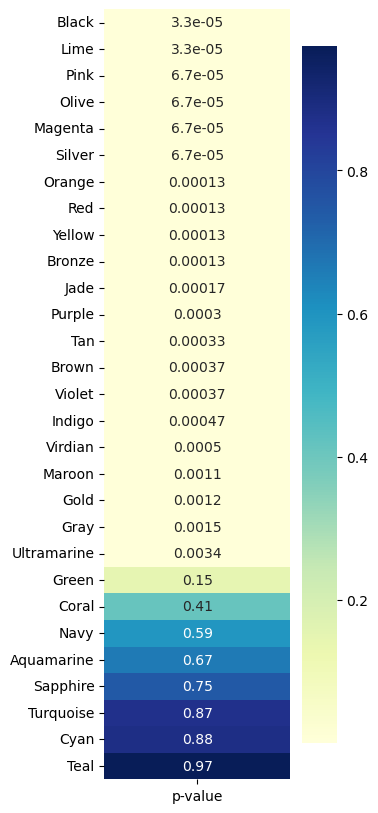

In [15]:
np.random.seed(0)
blue_clicks = df.T.Blue.values
color_to_p_value = {}
for color, color_clicks in df_not_blue.items():
    p_value = permutation_test(blue_clicks, color_clicks) 
    color_to_p_value[color] = p_value
sorted_colors, sorted_p_values = zip(*sorted(color_to_p_value.items(), key=lambda x: x[1]))
plt.figure(figsize=(3, 10))
sns.heatmap([[p_value] for p_value in sorted_p_values], cmap='YlGnBu', annot=True, xticklabels=['p-value'], yticklabels=sorted_colors)
plt.show()

In [16]:
mean_black = df_not_blue.Black.mean()
print(f"Mean click-rate of black is {mean_black}")


Mean click-rate of black is 21.6


In [20]:
remaining_colors = df[df.T.mean().values > blue_clicks.mean()].index 
size = remaining_colors.size
print(f"{size} colors have on average more clicks than Blue:") 
print(remaining_colors.values)

5 colors have on average more clicks than Blue:
['Sapphire' 'Navy' 'Teal' 'Ultramarine' 'Aquamarine']


In [21]:

for color, p_value in sorted(color_to_p_value.items(), key=lambda x: x[1]):
    if color in remaining_colors:
        mean = df_not_blue[color].mean()
        print(f"{color} has a p-value of {p_value} and a mean of {mean}")

Ultramarine has a p-value of 0.0034 and a mean of 34.2
Navy has a p-value of 0.5911666666666666 and a mean of 29.3
Aquamarine has a p-value of 0.6654666666666667 and a mean of 29.2
Sapphire has a p-value of 0.7457666666666667 and a mean of 28.9
Teal has a p-value of 0.9745 and a mean of 28.45


In [22]:
significance_level = 0.05 / 29
print(f"Adjusted significance level is {significance_level}") 
if color_to_p_value['Ultramarine'] <= significance_level:
    print("Our p-value is statistically significant")
else:
    print("Our p-value is not statistically significant")


Adjusted significance level is 0.001724137931034483
Our p-value is not statistically significant


In [23]:
hypothetical_sig_level = 0.05 / 5
print(f"Hypothetical significance level is {hypothetical_sig_level}") 
if color_to_p_value['Ultramarine'] <= hypothetical_sig_level:
    print("Our hypothetical p-value would have been statistically significant") 
else:
    print("Our hypothetical p-value would not have been statistically significant")

Hypothetical significance level is 0.01
Our hypothetical p-value would have been statistically significant
